# PheWas and Data Manipulation

Import libraries and map

In [446]:
import pandas as pd
import numpy as np
from phemap import Phemap
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats
import seaborn as sns
import math
from tabulate import tabulate

In [447]:
source_file = 'data/phecode_definitions1.2.csv'
mapping_file = 'data/phecode_map.csv'

In [448]:
def normalise(x):
    return (x - np.mean(x)) / np.std(x)

In [449]:
phemap = Phemap(source_file=source_file, mapping_file=mapping_file)

## Add age and gender

In [548]:
df = pd.read_csv("I:/UKB_DATA/main_df/ukb45494.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,12,39,40,42,43,44,45,46,198,200,220,222,224,226,228,230,232,234,236,366,367,2409,2412,2422,2425,2435,2438,2448,2451,2461,2464,2474,2477,2487,2490,2500,2503,2513,2516,2525,2526,2528,2529,2539,2542,2551,2552,2554,2555,2565,2568,2578,2581,2591,2594,2604,2607,2617,2620,2629,2630,2632,2633,2643,2646,2656,2659,2669,2672,2682,2685,2695,2698,2707,2708,2710,2711,2721,2724,2734,2737,2747,2750,2759,2760,2762,2763,2772,2773,2775,2776,2785,2786,2788,2789,2798,2799,2801,2802,2813,2820,2827,2828,2835,2836,3050,3258) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [549]:
imaging=pd.read_csv("I:/UKB_DATA/raw/hw/hwpheno.tsv", sep='\t',index_col=0)
#imaging=pd.read_csv("I:/UKB_DATA/raw/hw/hw_normal.tsv", sep='\t',index_col=0)
#imaging=pd.read_csv("I:/UKB_DATA/normal/h/normal_lv_height.tsv", sep='\t')
#imaging=pd.read_csv("I:/UKB_DATA/normal/w/normal_lv_width.tsv", sep='\t')

In [550]:
#imaging['hw']=imaging['pheno']

In [551]:
imaging

,idx,hw
0,1000012,1.802815
1,1000158,1.998127
3,1000262,1.603950
4,1000369,1.655384
5,1000489,1.803001
...,...,...
36263,6024290,1.907692
36264,6024323,1.835910
36265,6024624,1.946645
36266,6024638,1.358076


In [552]:
gender = []
for idx in imaging['idx']:
    gender.append(np.array(df[df['eid']==idx]['31-0.0']))

In [553]:
gender

[array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([1.]),
 array([1.]),
 array([0.]),
 array([1.]),
 array([0.]),
 array

In [554]:
imaging['gender']=np.stack(gender).reshape(-1)

In [555]:
age = []
for idx in imaging['idx']:
    age.append(np.array(df[df['eid']==idx]['21003-0.0']))

In [556]:
imaging['age']=np.stack(age).reshape(-1)

In [557]:
imaging 

,idx,hw,gender,age
0,1000012,1.802815,0.0,59.0
1,1000158,1.998127,1.0,44.0
3,1000262,1.603950,0.0,58.0
4,1000369,1.655384,0.0,60.0
5,1000489,1.803001,1.0,66.0
...,...,...,...,...
36263,6024290,1.907692,1.0,41.0
36264,6024323,1.835910,0.0,56.0
36265,6024624,1.946645,0.0,44.0
36266,6024638,1.358076,0.0,65.0


In [558]:
imaging.to_csv("hw_sex_age.csv",index=False)

# PheWas

Read non-imaging phenotypes

In [559]:
with open(r"patient_diag", "rb") as input_file:
    non_imaging = pickle.load(input_file)
len(non_imaging)

502461

Read imaging phenotypes

In [560]:
imaging = pd.read_csv("hw_sex_age.csv")
len(imaging)

31717

Filter the patients for imaging and non-imaging

Contract Ids

In [561]:
relevant_ids = np.array(imaging['idx'])
ef1 = np.array([])
ef2 = np.array([])
lved1 = np.array([])
lved2 = np.array([])

Contracted array

## Exclude imaging phenotypes that are abnormal
* LVEF 48 - 70% 
* LVEDV 88 - 218
* LVESV 31 - 97

In [562]:
df=df[['eid', '22420-2.0', '22420-3.0', '22421-2.0','22421-3.0','22422-2.0','22422-3.0']]
df=df.rename(columns={'eid':'idx',
                    '22420-2.0':'EF1',
                    '22420-3.0':'EF2',
                    '22421-2.0':"LVED1",
                   "22421-3.0":"LVED2",
                   "22422-2.0":"LVES1",
                   "22422-3.0":"LVES2"
                  })
df = pd.merge(imaging,df,on='idx')
df

,idx,hw,gender,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000012,1.802815,0.0,59.0,45.0,NaN,125.0,NaN,68.0,NaN
1,1000158,1.998127,1.0,44.0,52.0,NaN,130.0,NaN,62.0,NaN
2,1000262,1.603950,0.0,58.0,56.0,NaN,127.0,NaN,56.0,NaN
3,1000369,1.655384,0.0,60.0,60.0,NaN,104.0,NaN,42.0,NaN
4,1000489,1.803001,1.0,66.0,57.0,NaN,115.0,NaN,49.0,NaN
...,...,...,...,...,...,...,...,...,...,...
31712,6024290,1.907692,1.0,41.0,50.0,NaN,177.0,NaN,89.0,NaN
31713,6024323,1.835910,0.0,56.0,68.0,NaN,86.0,NaN,28.0,NaN
31714,6024624,1.946645,0.0,44.0,57.0,NaN,128.0,NaN,55.0,NaN
31715,6024638,1.358076,0.0,65.0,42.0,NaN,136.0,NaN,79.0,NaN


In [563]:
lv_associated = df

In [564]:
lv_associated['LVED1'] = lv_associated['LVED1'].fillna(90)
lv_associated['LVED2'] = lv_associated['LVED2'].fillna(90)

In [565]:
lv_associated=lv_associated.fillna(60)

In [566]:
lv_associated

,idx,hw,gender,age,EF1,EF2,LVED1,LVED2,LVES1,LVES2
0,1000012,1.802815,0.0,59.0,45.0,60.0,125.0,90.0,68.0,60.0
1,1000158,1.998127,1.0,44.0,52.0,60.0,130.0,90.0,62.0,60.0
2,1000262,1.603950,0.0,58.0,56.0,60.0,127.0,90.0,56.0,60.0
3,1000369,1.655384,0.0,60.0,60.0,60.0,104.0,90.0,42.0,60.0
4,1000489,1.803001,1.0,66.0,57.0,60.0,115.0,90.0,49.0,60.0
...,...,...,...,...,...,...,...,...,...,...
31712,6024290,1.907692,1.0,41.0,50.0,60.0,177.0,90.0,89.0,60.0
31713,6024323,1.835910,0.0,56.0,68.0,60.0,86.0,90.0,28.0,60.0
31714,6024624,1.946645,0.0,44.0,57.0,60.0,128.0,90.0,55.0,60.0
31715,6024638,1.358076,0.0,65.0,42.0,60.0,136.0,90.0,79.0,60.0


In [567]:
np.array(lv_associated['EF2'])[0]>30

True

In [568]:
exclude = (np.array(lv_associated['EF1'])<48) | \
(np.array(lv_associated['EF1'])>70) | \
(np.array(lv_associated['EF2'])<48) | \
(np.array(lv_associated['EF2'])>70) | \
(np.array(lv_associated['LVED1'])<88) | \
(np.array(lv_associated['LVED1'])>218) | \
(np.array(lv_associated['LVED2'])<88) | \
(np.array(lv_associated['LVED2'])>218) | \
(np.array(lv_associated['LVES1'])<31) | \
(np.array(lv_associated['LVES1'])>93) | \
(np.array(lv_associated['LVES2'])<31) | \
(np.array(lv_associated['LVES2'])>93)

In [569]:
exclude

array([ True, False, False, ..., False,  True, False])

In [570]:
imaging = imaging[~exclude]

In [571]:
to_delete=[]
for idx in non_imaging:
    if(not(idx in np.array(imaging['idx']))):
        to_delete.append(idx)

In [572]:
for idx in to_delete:
    del non_imaging[idx]

In [573]:
cnt=0
for idx in imaging['idx']:
    if(not(idx in non_imaging)):
        imaging=imaging.drop(cnt)
    cnt+=1

In [574]:
len(imaging)

26977

In [575]:
len(non_imaging)

26977

Normalize and adjust for confounding factors

In [576]:
imaging

,idx,hw,gender,age
1,1000158,1.998127,1.0,44.0
2,1000262,1.603950,0.0,58.0
3,1000369,1.655384,0.0,60.0
4,1000489,1.803001,1.0,66.0
5,1000542,1.720180,0.0,57.0
...,...,...,...,...
31710,6024127,1.710526,0.0,44.0
31711,6024225,1.548292,0.0,63.0
31712,6024290,1.907692,1.0,41.0
31714,6024624,1.946645,0.0,44.0


In [577]:
conf = np.stack((imaging['gender'], imaging['age']), axis=1)
conf = (conf - np.mean(conf, axis=0)) / np.std(conf, axis=0)

In [578]:
n_row = conf.shape[1]
n_col = imaging.shape[1]
beta = np.zeros((n_row, n_col))
i=1
x = imaging.iloc[:, i]
beta[:, i] = np.dot(np.linalg.pinv(conf), x)
x = x - np.dot(conf, beta[:, i])
x = normalise(x)
imaging.iloc[:, i] = x

In [579]:
imaging

,idx,hw,gender,age
1,1000158,1.318310,1.0,44.0
2,1000262,-0.732135,0.0,58.0
3,1000369,-0.349898,0.0,60.0
4,1000489,0.452613,1.0,66.0
5,1000542,0.022618,0.0,57.0
...,...,...,...,...
31710,6024127,-0.298479,0.0,44.0
31711,6024225,-1.004258,0.0,63.0
31712,6024290,0.656435,1.0,41.0
31714,6024624,1.274912,0.0,44.0


Patients filtered now

In [580]:
all_codes=phemap.get_all_phecodes()

In [581]:
all_phe_codes=[]

In [582]:
for i in range(len(all_codes)):
    all_phe_codes.append(all_codes[i]['phecode'])

In [583]:
PheWasDic = {}
PheWasDic['idx'] = np.array(imaging['idx'])
PheWasDic['pheno'] = np.array(imaging['hw'])

In [584]:
for phecode in all_phe_codes:
    diagnosed = []
    for patient in non_imaging:
        if (phecode in non_imaging[patient]):
            diagnosed.append(1)
        else:
            diagnosed.append(0)  
    PheWasDic[phecode] = np.array(diagnosed)

In [585]:
PheWasDic

{'idx': array([1000158, 1000262, 1000369, ..., 6024290, 6024624, 6024797],
       dtype=int64),
 'pheno': array([ 1.3183099 , -0.73213529, -0.34989797, ...,  0.65643535,
         1.27491213, -0.27337644]),
 '008': array([0, 0, 0, ..., 0, 0, 0]),
 '008.5': array([0, 0, 0, ..., 0, 0, 0]),
 '008.51': array([0, 0, 0, ..., 0, 0, 0]),
 '008.52': array([0, 0, 0, ..., 0, 0, 0]),
 '008.6': array([0, 0, 0, ..., 0, 0, 0]),
 '008.7': array([0, 0, 0, ..., 0, 0, 0]),
 '010': array([0, 0, 0, ..., 0, 0, 0]),
 '031': array([0, 0, 0, ..., 0, 0, 0]),
 '031.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038': array([0, 0, 0, ..., 0, 0, 0]),
 '038.1': array([0, 0, 0, ..., 0, 0, 0]),
 '038.2': array([0, 0, 0, ..., 0, 0, 0]),
 '038.3': array([0, 0, 0, ..., 0, 0, 0]),
 '041': array([0, 0, 0, ..., 0, 0, 0]),
 '041.1': array([0, 0, 0, ..., 0, 0, 0]),
 '041.11': array([0, 0, 0, ..., 0, 0, 0]),
 '041.12': array([0, 0, 0, ..., 0, 0, 0]),
 '041.2': array([0, 0, 0, ..., 0, 0, 0]),
 '041.21': array([0, 0, 0, ..., 0, 0, 0]),
 

In [586]:
dfp =pd.DataFrame.from_dict(PheWasDic)

In [587]:
dfp.to_csv("phewas.csv")

Table structure:
eid___hw___phenocode1___phenocode2.....
eid, float,

## Perform PheWas

In [588]:
phe_table = pd.read_csv("phewas.csv")

Additional quant traits are:
* systolic_pressure
* diastolic_pressure
* pulse_rate

In [589]:
quant_traits=pd.read_csv("quant_traits.csv")

In [590]:
phe_table = pd.merge(phe_table,quant_traits, on ='idx')

In [591]:
phe_table
#    temp = phe_table[['pheno', phecode]].dropna()

,Unnamed: 0,idx,pheno,008,008.5,008.51,008.52,008.6,008.7,010,...,989,990,994,994.1,994.2,994.21,996,systolic_pressure,diastolic_pressure,pulse_rate
0,0,1000158,1.318310,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,153.0,95.0,68.0
1,1,1000262,-0.732135,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,130.0,73.0,71.0
2,2,1000369,-0.349898,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,141.0,83.0,80.0
3,3,1000489,0.452613,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,145.0,89.0,66.0
4,4,1000542,0.022618,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26971,26972,6024127,-0.298479,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,134.0,96.0,85.0
26972,26973,6024225,-1.004258,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,119.0,70.0,62.0
26973,26974,6024290,0.656435,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,132.0,85.0,62.0
26974,26975,6024624,1.274912,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


Normalize

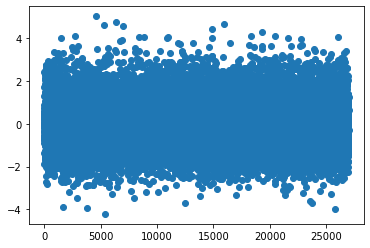

In [592]:
plt.scatter(np.arange(len(phe_table['pheno'])),phe_table['pheno'])

# PERFORM THE ASSOCIATION

In [593]:
results = {}

In [594]:
results['phecode'] = np.array(phe_table.columns[3:])

In [ ]:
ccs = []
p_vals = []
for phecode in phe_table.columns[3:]:
    temp = phe_table[['pheno', phecode]].dropna()
    cc, p_val = scipy.stats.pearsonr(temp['pheno'], temp[phecode])
    ccs.append(cc)
    p_vals.append(p_val)
    
results['ccs']=ccs
results['p_vals']=p_vals

In [ ]:
results = pd.DataFrame.from_dict(results)

Drop Nans

In [ ]:
results = results.dropna()

In [ ]:
results

In [ ]:
log_corr_p = - np.log10(results['p_vals'])

In [ ]:
log_corr_p

In [ ]:
results['log_cor']=log_corr_p

In [ ]:
results.to_csv("hw_phewas_results.csv",index=False)

# ANalyize and Plot


Bonferroni correction

In [ ]:
results=pd.read_csv("hw_phewas_results.csv")

In [ ]:
len(results)

In [ ]:
p_bonf = 0.05 / len(phemap.get_all_phecodes())

In [ ]:
p_bonf

In [ ]:
print('Number of correlations reaching Bonferroni threshold = {0}'.format(np.sum(results['p_vals'] < p_bonf)))

In [ ]:
relevant = np.array(results[results['p_vals']<p_bonf])

In [ ]:
relevant

In [ ]:
table = []
table.append(["PheCode", "CorCoef", "P_VAL"])
for p in relevant:
    try:
        table.append([phemap.get_phecode_info(p[0])['phenotype'], p[1] ,p[2]])
    except:
        table.append([p[0], p[1] ,p[2]])


In [ ]:
print(tabulate(table))

In [ ]:
categories = []
for i in range(len(results)):
    try:
        categories.append(phemap.get_phecode_info(results['phecode'][i])['category'])
    except:
        categories.append("quant measurements")

In [ ]:
results['categories']=categories
results.to_csv("hw_phewas_results.csv",index=False)

In [ ]:
len(np.unique(results['categories']))

In [ ]:
pal1 = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue']


In [ ]:
pal2 = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue','green']


In [ ]:
pal3 = ['green', 'blue', 
       'purple', 'orange', 
       'pink', 'blue',
      'blue','red',
      'brown', 'green',
      'black', 'yellow',
      'purple', 'gray',
       'gold','blue','green','red']

In [ ]:
results

In [ ]:
positive_cor

In [ ]:
markers=["^","v"]
positive_cor = results[results['ccs']>0]
negative_cor = results[results['ccs']<0]
significant = results[results['p_vals']<p_bonf]
sns.scatterplot(x=positive_cor['phecode'].index, y=positive_cor['log_cor'], size=np.abs(positive_cor['ccs']),
                     hue=positive_cor['categories'],sizes=(30, 80), 
                     alpha=0.8, palette=pal3, marker="^", ec="face")
sns.scatterplot(x=negative_cor['phecode'].index, y=negative_cor['log_cor'], size=np.abs(negative_cor['ccs']), hue=negative_cor['categories'],
                     sizes=(30, 80), 
                     alpha=0.8, palette=pal3, marker="v", ec="face")

plt.plot([0, 1000], [-math.log10(p_bonf), -math.log10(p_bonf)], 'k--', linewidth=1, alpha=0.8)
for index, sig in significant.iterrows():
    try:
        name= phemap.get_phecode_info(sig['phecode'])['phenotype']
    except:
        name = sig['phecode']
        
    plt.text(x= index,
             y= sig['log_cor'],
             s = name,
             fontdict=dict(color='black',size=4)) 
    
plt.ylabel('-log_10(p)')
plt.legend([])
plt.grid()
plt.show()
plt.savefig("foo2.png",dpi=200)

In [ ]:
np.unique(results['categories'])

# Get EF LVED and LVES

22420-2.0 and 22420-3.0 Ejection Fraction <br>
22421	LV end diastolic volume <br>
22422   Left ventricular size and function  


In [638]:
isIn = []
for idx in np.array(df['eid']):
    isIn.append(idx in np.array(imaging['idx']))

KeyError: 'eid'

In [639]:
df=df[isIn]

In [640]:
df.to_csv("main_df_relevant_ids.csv",index=False)

In [641]:
df['22420-2.0']

KeyError: '22420-2.0'

In [642]:
df = pd.read_csv("main_df_relevant_ids.csv")

EmptyDataError: No columns to parse from file

In [643]:
new_dic = {
"idx" : np.array(df['eid']),
"EF1" : np.array(df['22420-2.0']),
"EF2" : np.array(df['22420-3.0']),
"LVED1": np.array(df['22421-2.0']),
"LVED2": np.array(df['22421-3.0']),
"LVES1": np.array(df['22422-2.0']),
"LVES2": np.array(df['22422-3.0'])
}

KeyError: 'eid'

In [ ]:
pd.DataFrame.from_dict(new_dic).to_csv("main_df_relevant_ids.csv",index=False)

## Plot hw differences

In [ ]:
import pandas as pd
from utils import exclude_abnormal
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv(p1,sep='\t')


1. Identify phecode 
    * Cardiomyopathy 
    [425.0, 425.1, 425.11, 425.12, 425.2,425.8]
 
    * Atrial fibrillation
    [427.2, 427.21, 427.22]
    * Heart failures [427.4,
 427.42,]
    
    * Type 2 Diabetes 
   [250.2,
 250.21,
 250.22,
 250.23,
 250.24,
 250.25]
    * Hypertension 
[401.0, 401.1, 401.2, 401.21, 401.22, 401.3]

    * Chronic kidney disease 
[585.0,
 585.1,
 585.2,
 585.3,
 585.31,
 585.32,
 585.33,
 585.34,
 585.4]
    * Aortic valve disease	394‑399.99
[394.0,
 394.1,
 394.2,
 394.3,
 394.4,
 394.7,
 395.0,
 395.1,
 395.2,
 395.3,
 395.4,
 395.6]
    * Carditis [420.0, 420.1, 420.2, 420.21, 420.22, 420.3]
    * AV Node Distal Con disease
 [426.0, 426.2,426.21,426.22,426.23,426.24]
2. divide ids in the group and compute mean and std for all


In [ ]:
cariomyopathy = [425, 425.1, 425.11, 425.12, 425.2,425.8]
atrial_fib = [427.2, 427.21, 427.22]
heart_failures = [427.4, 427.42]
diabetes =  [250.2, 250.21, 250.22, 250.23, 250.24, 250.25]
hypertension = [250.2, 250.21, 250.22, 250.23, 250.24, 250.25]
chronic_kidney_disease = [585, 585.1, 585.2, 585.3, 585.31, 585.32, 585.33, 585.34, 585.4]
aortic_valve_disease = [394, 394.1, 394.2, 394.3, 394.4, 394.7, 395, 395.1, 395.2, 395.3, 395.4, 395.6]
carditis = [420, 420.1, 420.2, 420.21, 420.22, 420.3]
av_node = [426, 426.2,426.21,426.22,426.23,426.24]

In [ ]:
def get_ids(phe_codes):
    
    phe_table=pd.read_csv("phewas.csv")
    ids = phe_table[str(phe_codes[0])]
    for code in phe_codes:
        ids |= phe_table[str(code)]
    return np.array(ids)==1

In [ ]:
def get_pheno(ids):
    df= pd.read_csv("/mnt/i/UKB_DATA/imputed_UKB/hwpheno.tsv",sep='\t')
    df=df[~(df['idx']==1273917)]
    return np.array(df[ids]['hw'])

In [ ]:
cariomyopathy_ids=get_ids(cariomyopathy)
artrial_fib_ids=get_ids(atrial_fib)
heart_failures_ids=get_ids(heart_failures)
diabetes_ids=get_ids(diabetes)
hypertension_ids=get_ids(hypertension)
chronic_kidney_disease_ids=get_ids(chronic_kidney_disease)
aortic_valve_disease_ids = get_ids(aortic_valve_disease)
carditis_ids=get_ids(carditis)
av_node_ids=get_ids(av_node)

In [ ]:
normal= cariomyopathy_ids | artrial_fib_ids | heart_failures_ids | diabetes_ids | hypertension_ids | chronic_kidney_disease_ids | aortic_valve_disease_ids | carditis_ids | av_node_ids
normal = ~ normal

In [ ]:
np.array(cariomyopathy_ids)==1

In [ ]:
cardiomyopathy_hw=get_pheno(cariomyopathy_ids)
artrial_fib_hw=get_pheno(artrial_fib_ids)
heart_failures_hw= get_pheno(heart_failures_ids)
diabetes_hw = get_pheno(diabetes_ids)
hypertension_hw = get_pheno(hypertension_ids)
chronic_kidney_disease_hw = get_pheno(chronic_kidney_disease_ids)
aortic_valve_disease_hw = get_pheno(aortic_valve_disease_ids)
carditis_hw = get_pheno(carditis_ids)
av_node_hw = get_pheno(av_node_ids)
normal_hw = get_pheno(normal)

In [ ]:
data = [normal_hw, cardiomyopathy_hw, heart_failures_hw, artrial_fib_hw, av_node_hw, diabetes_hw, hypertension_hw, chronic_kidney_disease_hw, aortic_valve_disease_hw,carditis_hw,]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
plt.ylabel("HW")
# Creating plot
bp = ax.boxplot(data)
t11 = ['00', f'Reference n={len(normal_hw)}', f'Cardiomyopathy n={len(cardiomyopathy_hw)}',
       f'Heart Failure n={len(heart_failures_hw)}', f'Atrial Fibrilation n={len(artrial_fib_hw)}',
       f'AV node n={len(av_node_hw)}',  f'Type 2 Diabetes n={len(diabetes_hw)}', f'Hypertension n={len(hypertension_hw)}',
       f'Kidney Disease n={len(chronic_kidney_disease_hw)}',f'Aortic Valve n={len(aortic_valve_disease_hw)}',f'Carditis n={len(carditis_hw)}']
plt.xticks(range(len(t11)), t11, size='small',rotation='vertical')
plt.title("Differences in HW pheno")
plt.show()

## Correlation between quant vars

In [622]:
a = np.array(phe_table['systolic_pressure'])
b = np.array(phe_table['diastolic_pressure'])
c = np.array(phe_table['pulse_rate'])

In [652]:
#cor(a,c)
#cor(b,c)
#cor(a,b)

(0.23940571848740988, 0.0)

In [644]:
def cor(a,b):
    include = ( (a == a) & (b==b) )
    a=a[include]
    b=b[include]
    return scipy.stats.pearsonr(a, b)